In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [2]:
y_target = df['default']
X_features = df.drop('default', axis=1)

In [3]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

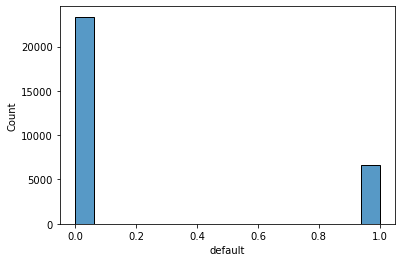

In [4]:
import seaborn as sns

#default의 빈도를 확인한다.
sns.histplot(y_target)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

def crossEval(model, X_features, y_target):
    scores = np.round(cross_val_score(clone(model), X_features, y_target, cv=3), 3)
    
    print(scores)
    print(f'3 fold 평균 점수 : {scores.mean():.3f}')

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=400)

crossEval(lr, X_features, y_target)

[0.779 0.779 0.779]
3 fold 평균 점수 : 0.779


In [7]:
from sklearn.preprocessing import StandardScaler

def scaleDf(input_df, columns):
    df = input_df.copy()
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [8]:
columns = ['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X_scaled = scaleDf(X_features, columns)

print(X_scaled.head(3))

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE     PAY_1     PAY_2     PAY_3  \
0  -1.136720    2          2         1   24  1.794564  1.782348 -0.696663   
1  -0.365981    2          2         2   26 -0.874991  1.782348  0.138865   
2  -0.597202    2          2         2   34  0.014861  0.111736  0.138865   

      PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0 -0.666599 -1.530046  ...  -0.667993  -0.672497  -0.663059  -0.652724   
1  0.188746  0.234917  ...  -0.639254  -0.621636  -0.606229  -0.597966   
2  0.188746  0.234917  ...  -0.482408  -0.449730  -0.417188  -0.391630   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
1 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
2 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  

[3 rows x 23 columns]


In [9]:
crossEval(lr, X_scaled, y_target)

[0.806 0.814 0.809]
3 fold 평균 점수 : 0.810


In [10]:
X_scaled = scaleDf(X_features, X_features.columns)

crossEval(lr, X_scaled, y_target)

[0.806 0.814 0.809]
3 fold 평균 점수 : 0.810


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

pca_columns=['pca_component_1','pca_component_2']
pca_df = pd.DataFrame(x_pca,columns=pca_columns)
pca_df['target'] = y_target
pca_df.head(5)

,pca_component_1,pca_component_2,target
0,-1.887962,-0.906108,1
1,-0.764696,-2.109288,1
2,-0.847408,-1.072179,0
3,-0.196589,-0.809022,0
4,-0.840934,-0.072538,0


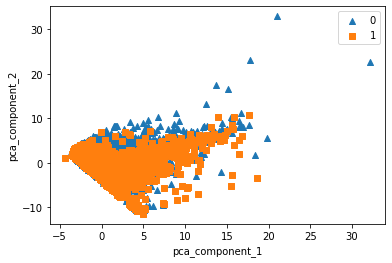

In [12]:
import matplotlib.pyplot as plt

x_axis_data = pca_df[pca_df['target']==0]['pca_component_1']
y_axis_data = pca_df[pca_df['target']==0]['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='^', label='0')

x_axis_data = pca_df[pca_df['target']==1]['pca_component_1']
y_axis_data = pca_df[pca_df['target']==1]['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='s', label='1')

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

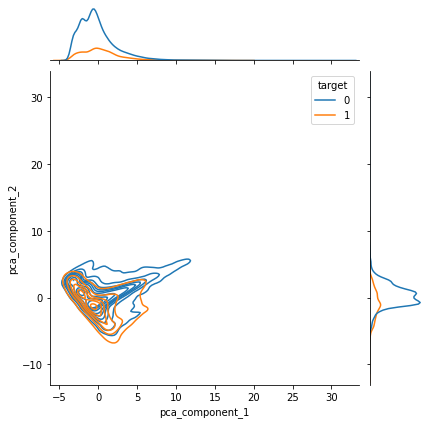

In [13]:
sns.jointplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='target', kind="kde")

In [14]:
def PCAeval(pca_n, model, X_features, y_target):
    
    pca = PCA(n_components=pca_n)
    pca.fit(X_features)
    x_pca = pca.transform(X_features)
    
    pca_columns = ('pca_component_' + str(x + 1) for x in range(pca_n))
    
    print(f'PCA n_compo={pca_n}')
    pca_df = pd.DataFrame(x_pca,columns=pca_columns)
    crossEval(model, pca_df, y_target)

In [15]:
PCAeval(2, lr, X_scaled, y_target)

PCA n_compo=2
[0.794 0.797 0.796]
3 fold 평균 점수 : 0.796


In [16]:
PCAeval(3, lr, X_scaled, y_target)

PCA n_compo=3
[0.794 0.796 0.797]
3 fold 평균 점수 : 0.796


In [17]:
PCAeval(5, lr, X_scaled, y_target)

PCA n_compo=5
[0.796 0.796 0.796]
3 fold 평균 점수 : 0.796


In [18]:
PCAeval(10, lr, X_scaled, y_target)

PCA n_compo=10
[0.799 0.8   0.799]
3 fold 평균 점수 : 0.799


In [19]:
PCAeval(16, lr, X_scaled, y_target)

PCA n_compo=16
[0.806 0.814 0.81 ]
3 fold 평균 점수 : 0.810


In [20]:
PCAeval(20, lr, X_scaled, y_target)

PCA n_compo=20
[0.806 0.814 0.809]
3 fold 평균 점수 : 0.810


In [21]:
PCAeval(23, lr, X_scaled, y_target)

PCA n_compo=23
[0.806 0.814 0.809]
3 fold 평균 점수 : 0.810


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=6)

In [24]:
PCAeval(2, dt, X_scaled, y_target)

PCA n_compo=2
[0.797 0.804 0.808]
3 fold 평균 점수 : 0.803


In [25]:
PCAeval(23, dt, X_scaled, y_target)

PCA n_compo=23
[0.8   0.812 0.814]
3 fold 평균 점수 : 0.809


In [26]:
PCAeval(10, dt, X_scaled, y_target)

PCA n_compo=10
[0.795 0.797 0.807]
3 fold 평균 점수 : 0.800


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

lr2 = LogisticRegression(max_iter=400)
lr2.fit(X_train, y_train)
preds = lr2.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [32]:
get_clf_eval(y_test, preds)

오차 행렬
[[7008    1]
 [1991    0]]
정확도: 0.7787, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, AUC:0.4999


제가 뭔가를 잘못한것 같은데, 뭔지를 모르겠습니다ㅠㅠ 
PCA를 해서 등고선 그래프를 그려봤는데 실습할 때처럼 깔끔하게 두 영역이 분리되지 않고
target이 1인 경우와 0인 경우 모두 영역이 상당히 겹칩니다.

PCA가 제대로 되지 않았음에도 제 모델에서 점수가 높게 나왔던 이유는, 
기본적으로 데이터가 target이 1인 숫자가 적어서(0.2정도 비율)인듯 합니다! 
사실상 모든 데이터에 대해 값을 0이라고 예측하는 것 같습니다. 
따라서 tn이 많아서 정확도가 높았는데, 
tp는 0이므로 정밀도와 재현율은 망했습니다ㅠㅠ